In [32]:
#Import Library

import tensorflow as tf
import numpy as np
import os
import sys
import cv2
import matplotlib.pyplot as plt
import pickle
import random
import pandas as pd 


import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [13]:
DATA_DIR    = r'C:\Users\MYPC\Desktop\CNN\brain_tumer_pred\brain_tumor_dataset\brain_tumor_data'
CATEGORIES  = ['no','yes']
IMAGE_SIZE  = 50

In [14]:
#fn to load data

def create_training_data():
    training_date = []
    for categories in CATEGORIES:
        path = os.path.join(DATA_DIR,categories)
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
                training_date.append([new_array,class_num])
            except:
                pass
    return training_date

In [15]:
data = np.array(create_training_data())

C:\Users\MYPC\anaconda3\envs\tensorflow_gpu\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [16]:
x_data = []
y_data = []

for x in data:
    x_data.append(x[0])
    y_data.append(x[1])

In [17]:
#Normalize image

x_data_np = np.asarray(x_data)/255.0
y_data_np = np.asarray(y_data)

In [19]:
x_data_np.shape,y_data_np.shape

((253, 50, 50), (253,))

In [20]:
#Store the data in pickle file so every time you dont have to load images¶

pickle_out = open('x_data_np_bt','wb')
pickle.dump(x_data_np,pickle_out)
pickle_out.close()

In [25]:
pickle_out = open('y_data_np_bt','wb')
pickle.dump(y_data_np,pickle_out)
pickle_out.close()

In [26]:
#Load the data set which is ND array¶

X_Temp    = open('x_data_np_bt','rb')
x_data_np_bt = pickle.load(X_Temp)

Y_Temp    = open('y_data_np_bt','rb')
y_data_np_bt = pickle.load(Y_Temp)


In [27]:
x_data_np_bt = x_data_np.reshape(-1, 50, 50, 1)

In [28]:
#perform the train_test_split

from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(x_data_np_bt,y_data_np_bt,test_size=0.25,random_state =101)

In [29]:
x_data_np_bt.shape

(253, 50, 50, 1)

In [33]:
#create cnn model using keras

model = Sequential()
model.add(Conv2D(150, (3, 3), input_shape=x_data_np_bt.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(75, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
model.fit(x_data_np_bt, y=y_data_np_bt, batch_size=10, epochs=32, validation_split=0.25)

Epoch 1/32
19/19 [==============================] - 1s 45ms/step - loss: 1.7301e-04 - accuracy: 1.0000 - val_loss: 0.8196 - val_accuracy: 0.8281
Epoch 2/32
19/19 [==============================] - 0s 15ms/step - loss: 1.5949e-04 - accuracy: 1.0000 - val_loss: 0.8145 - val_accuracy: 0.8281
Epoch 3/32
19/19 [==============================] - 0s 24ms/step - loss: 1.5005e-04 - accuracy: 1.0000 - val_loss: 0.8283 - val_accuracy: 0.8281
Epoch 4/32
19/19 [==============================] - 1s 33ms/step - loss: 1.3813e-04 - accuracy: 1.0000 - val_loss: 0.8056 - val_accuracy: 0.8281
Epoch 5/32
19/19 [==============================] - 1s 33ms/step - loss: 1.2722e-04 - accuracy: 1.0000 - val_loss: 0.8433 - val_accuracy: 0.8281
Epoch 6/32
19/19 [==============================] - 1s 33ms/step - loss: 1.1827e-04 - accuracy: 1.0000 - val_loss: 0.8776 - val_accuracy: 0.8281
Epoch 7/32
19/19 [==============================] - 1s 34ms/step - loss: 1.1011e-04 - accuracy: 1.0000 - val_loss: 0.8260 - val_ac

In [38]:
#save model
model.save('braintumCNN.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: braintumCNN.model\assets


In [39]:
#test

def prepare(filepath):
    training_date = []
    
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
    new_image =  new_array.reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
    return new_image

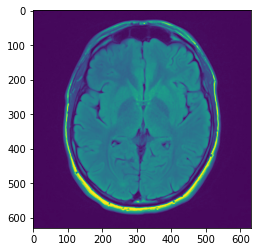

In [50]:
#testing an image from internet which has never seen by the cnn model

filepath = r'C:\Users\MYPC\Desktop\CNN\brain_tumer_pred\test01.jpeg'
img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)

plt.imshow(img_array)

In [52]:
test = model.predict([prepare(filepath=r'C:/Users/MYPC/Desktop/CNN/brain_tumer_pred/test01.jpeg')])

In [53]:
print(CATEGORIES[int(test[0][0])])

no
